In [1]:
%matplotlib notebook
import os
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as td
import torchvision as tv

from PIL import Image
import socket
from matplotlib import pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
from dataloader import VQADataset
from model import VQANet
from model import VQAStatsManager
import utils
import nntools as nt

In [3]:
train_set = VQADataset()

In [4]:
val_set = VQADataset(mode='val')

In [5]:
# iter(train_loader).next()[1].size()

In [6]:
vocab_size = train_set.get_vocabsize()
VQA_model = VQANet(vocab_size)
lr = 1e-4
VQA_model = VQA_model.to(device)
adam = torch.optim.Adam(VQA_model.parameters(), lr=lr)
stats_manager = VQAStatsManager()
output_path = os.path.join('checkpoint','five_validation_test')
VQA_train = nt.Experiment(VQA_model, train_set, val_set, adam, stats_manager,
               output_dir=output_path, batch_size=40, perform_validation_during_training=True)

In [7]:
def plot(exp, fig, axes):
    axes[0].clear()
    axes[1].clear()
    axes[0].plot([exp.history[k][0]['loss'] for k in range(exp.epoch)],
                 label="traininng loss")
    axes[0].plot([exp.history[k][1]['loss'] for k in range(exp.epoch)], label="exalution loss")
    axes[1].plot([exp.history[k][0]['accuracy'] for k in range(exp.epoch)],label = 'training accuracy')
    axes[1].plot([exp.history[k][1]['accuracy'] for k in range(exp.epoch)],label = 'evaluation accuracy')
    axes[0].legend()
    axes[1].legend()
    plt.tight_layout()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


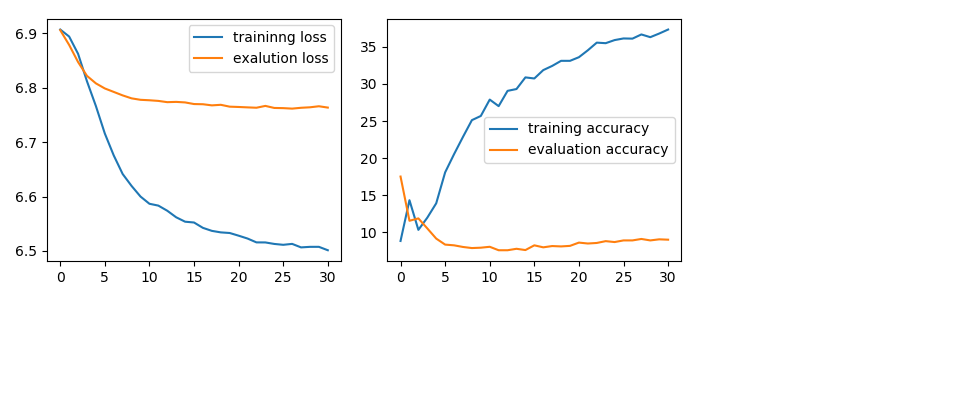

Start/Continue training from epoch 2
Epoch 3 (Time: 154.80s)
Epoch 4 (Time: 141.19s)
Epoch 5 (Time: 141.17s)
Epoch 6 (Time: 141.13s)
Epoch 7 (Time: 141.44s)
Epoch 8 (Time: 143.99s)
Epoch 9 (Time: 146.57s)
Epoch 10 (Time: 147.02s)
Epoch 11 (Time: 144.52s)
Epoch 12 (Time: 142.10s)
Epoch 13 (Time: 143.42s)
Epoch 14 (Time: 144.75s)
Epoch 15 (Time: 143.40s)
Epoch 16 (Time: 141.72s)
Epoch 17 (Time: 140.27s)
Epoch 18 (Time: 140.02s)
Epoch 19 (Time: 146.63s)
Epoch 20 (Time: 145.07s)
Epoch 21 (Time: 146.28s)
Epoch 22 (Time: 146.44s)
Epoch 23 (Time: 144.58s)
Epoch 24 (Time: 144.99s)
Epoch 25 (Time: 143.76s)
Epoch 26 (Time: 142.55s)
Epoch 27 (Time: 142.61s)
Epoch 28 (Time: 142.54s)
Epoch 29 (Time: 142.80s)
Epoch 30 (Time: 142.42s)
Epoch 31 (Time: 142.50s)


In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
# torch.backends.cudnn.benchmark=True
VQA_train.run(num_epochs=150, plot=lambda exp: plot(exp, fig=fig, axes=axes))
# torch.backends.cudnn.benchmark=False

In [ ]:
# VQA_train.val_loader = td.DataLoader(train_set, batch_size=16, shuffle=False,
#                                    drop_last=True, pin_memory=True)

In [ ]:
VQA_train.evaluate()

In [ ]:
# val_loader = td.DataLoader(train_set, batch_size=16, shuffle=False,
                                   drop_last=True, pin_memory=True)

In [ ]:
# iter(val_loader).next()

In [ ]:
# 'aa bb'.split(' ')

In [ ]:
a = torch.ones(40,5)

In [ ]:
b = torch.transpose(a,0,1)

In [ ]:
b[0].size().size()

In [ ]:
a.size() == (40,5)